In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# importing heart disease dataset
data = pd.read_csv("/heart_Kaggle_David_Lapp_Public_Health_Dataset.csv")
data1 = pd.read_csv("cardio_train_Kaggle_Svetlana.csv")
data2 = pd.read_csv("/heart_statlog_IEEE_Dataset.csv")

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age (Days)   70000 non-null  int64  
 2   Age (Years)  70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
data.restecg.unique()

array([1, 0, 2])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

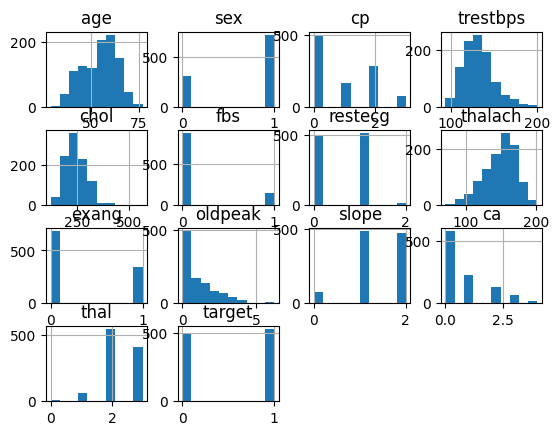

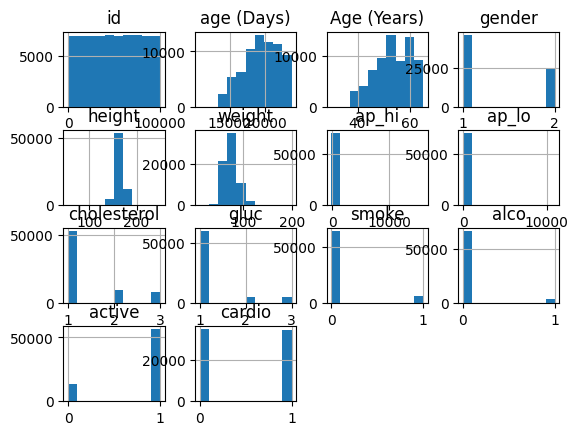

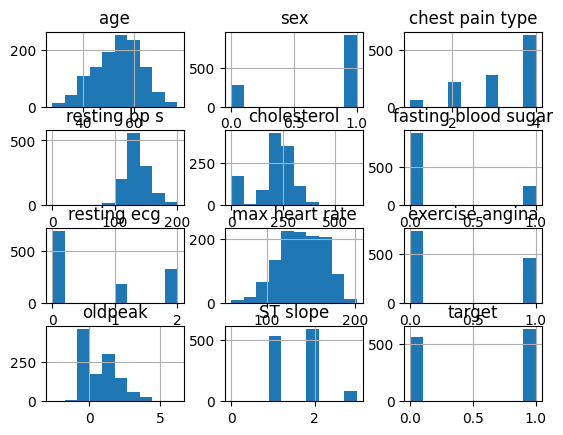

In [ ]:
data.hist()
data1.hist()
data2.hist()

In [ ]:
#all 3 Datasets: age, sex, cholesterol, target
#common between dataset 1 & 3: Everything beside column 12 ('CA') for dataset 1
#all datasets individually

In [ ]:
print(data.columns)
print(data1.columns)
print(data2.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['id', 'age (Days)', 'Age (Years)', 'gender', 'height', 'weight',
       'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
       'cardio'],
      dtype='object')
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [ ]:
data = data.rename(columns={"cp": "chest_pain_type", "trestbps":"resting_bp_s", "chol":"cholesterol", "fbs": "fasting_blood_sugar", "restecg" : "restingecg", "thalach": "max_heart_rate", "exang" : "exercise_angina", "slope": "ST_slope" })

In [ ]:
data

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,restingecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# dropping data that are not common
data = data.drop(["ca", "thal"], axis='columns')

In [ ]:
data

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,restingecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,52,1,0,125,212,0,1,168,0,1.0,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,0
4,62,0,0,138,294,1,1,106,0,1.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,1


In [ ]:
print(data.columns)
print(data1.columns)
print(data2.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'restingecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')
Index(['id', 'age (Days)', 'Age (Years)', 'gender', 'height', 'weight',
       'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
       'cardio'],
      dtype='object')
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [ ]:
# renaming the data sets to common names
data2 = data2.rename(columns={"chest pain type": "chest_pain_type", "resting bp s" : "resting_bp_s", "fasting blood sugar": "fasting_blood_sugar", "max heart rate" : "max_heart_rate", "exercise angina": "exercise_angina", "ST slope" : "ST_slope", "resting ecg": "restingecg"})

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,restingecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,52,1,0,125,212,0,1,168,0,1.0,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,0
4,62,0,0,138,294,1,1,106,0,1.9,1,0


In [ ]:
data2.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,restingecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# dropping dataset columns for common
data1 = data1[['Age (Years)', 'gender', 'cholesterol', 'cardio']]

In [ ]:
# renaming the columns
data1 = data1.rename(columns={"Age (Years)":"age", "gender":"sex", "cardio":"target"})

In [ ]:
# cleaning data and download CSV
data1.drop(columns=['id','age (Days)']).to_csv('data1_cleaned.csv')

In [ ]:
data1

,age,sex,cholesterol,target
0,50,2,1,0
1,55,1,3,1
2,52,1,3,1
3,48,2,1,1
4,48,1,1,0
...,...,...,...,...
69995,53,2,1,0
69996,62,1,2,1
69997,52,2,3,1
69998,61,1,1,1


In [ ]:
data2

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,restingecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
data + data2

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,restingecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,92.0,2.0,2.0,265.0,501.0,0.0,1.0,340.0,0.0,1.0,3.0,0.0
1,102.0,1.0,3.0,300.0,383.0,1.0,0.0,311.0,1.0,4.1,2.0,1.0
2,107.0,2.0,2.0,275.0,457.0,0.0,2.0,223.0,1.0,2.6,1.0,0.0
3,109.0,1.0,4.0,286.0,417.0,0.0,1.0,269.0,1.0,1.5,4.0,1.0
4,116.0,1.0,3.0,288.0,489.0,1.0,1.0,228.0,0.0,1.9,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   chest_pain_type      1025 non-null   int64  
 3   resting_bp_s         1025 non-null   int64  
 4   cholesterol          1025 non-null   int64  
 5   fasting_blood_sugar  1025 non-null   int64  
 6   restingecg           1025 non-null   int64  
 7   max_heart_rate       1025 non-null   int64  
 8   exercise_angina      1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  ST_slope             1025 non-null   int64  
 11  target               1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          70000 non-null  int64
 1   sex          70000 non-null  int64
 2   cholesterol  70000 non-null  int64
 3   target       70000 non-null  int64
dtypes: int64(4)
memory usage: 2.1 MB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   restingecg           1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
# adding data and data2 together and dropping duplicates
data_first_third = pd.concat([data, data2]).drop_duplicates()

In [ ]:
data1

,age,sex,cholesterol,target
0,50,2,1,0
1,55,1,3,1
2,52,1,3,1
3,48,2,1,1
4,48,1,1,0
...,...,...,...,...
69995,53,2,1,0
69996,62,1,2,1
69997,52,2,3,1
69998,61,1,1,1


In [ ]:
# replacing sex datapoints from 2 to 1 and 0 to 1
data1['sex'].map({2: 1, 1: 0})

0        1
1        0
2        0
3        1
4        0
        ..
69995    1
69996    0
69997    1
69998    0
69999    0
Name: sex, Length: 70000, dtype: int64

In [ ]:
data1['sex'] = data1['sex'].map({2: 1, 1: 0})

In [ ]:
data1['sex'].value_counts()

sex
0    45530
1    24470
Name: count, dtype: int64

In [ ]:
# creating new data_all dataset with all common datapoints from all 3 datasets
data_all = pd.concat([data_first_third, data1]).drop_duplicates()

In [ ]:
data_all = data_all[['age', 'sex', 'target']]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          70000 non-null  int64
 1   sex          70000 non-null  int64
 2   cholesterol  70000 non-null  int64
 3   target       70000 non-null  int64
dtypes: int64(4)
memory usage: 2.1 MB


In [ ]:
data_all["sex"].value_counts()

sex
1    1094
0     452
Name: count, dtype: int64

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546 entries, 0 to 56269
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1546 non-null   int64
 1   sex     1546 non-null   int64
 2   target  1546 non-null   int64
dtypes: int64(3)
memory usage: 48.3 KB


In [ ]:
data_first_third.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1220 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1220 non-null   int64  
 1   sex                  1220 non-null   int64  
 2   chest_pain_type      1220 non-null   int64  
 3   resting_bp_s         1220 non-null   int64  
 4   cholesterol          1220 non-null   int64  
 5   fasting_blood_sugar  1220 non-null   int64  
 6   restingecg           1220 non-null   int64  
 7   max_heart_rate       1220 non-null   int64  
 8   exercise_angina      1220 non-null   int64  
 9   oldpeak              1220 non-null   float64
 10  ST_slope             1220 non-null   int64  
 11  target               1220 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 123.9 KB


In [ ]:
# removing all datapoints in data_first_third that are cholesterol 0
data_first_third = data_first_third[data_first_third["cholesterol"] != 0]

In [ ]:
data_first_third.to_csv('data_first_third.csv')

In [ ]:
data.to_csv("data.csv")
data1.to_csv("data1.csv")
data2.to_csv("data2.csv")

In [ ]:
data_all.to_csv("data_all.csv")

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546 entries, 0 to 56269
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1546 non-null   int64
 1   sex     1546 non-null   int64
 2   target  1546 non-null   int64
dtypes: int64(3)
memory usage: 48.3 KB


In [ ]:
data_all.dropna()

,age,sex,target
0,52,1,0
1,53,1,0
2,70,1,0
3,61,1,0
4,62,0,0
...,...,...,...
30234,47,0,0
31319,65,1,0
43754,65,1,0
53626,45,1,0
